In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
path = '/content/sales_data.csv'

sales = pd.read_csv(path, parse_dates = ['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


### What's the mean of Customers_Age?

In [ ]:
sales['Customer_Age'].mean()

36.14143660866152

#### Go ahead and show a density (KDE) and a box plot with the Customer_Age data:

<Axes: ylabel='Density'>

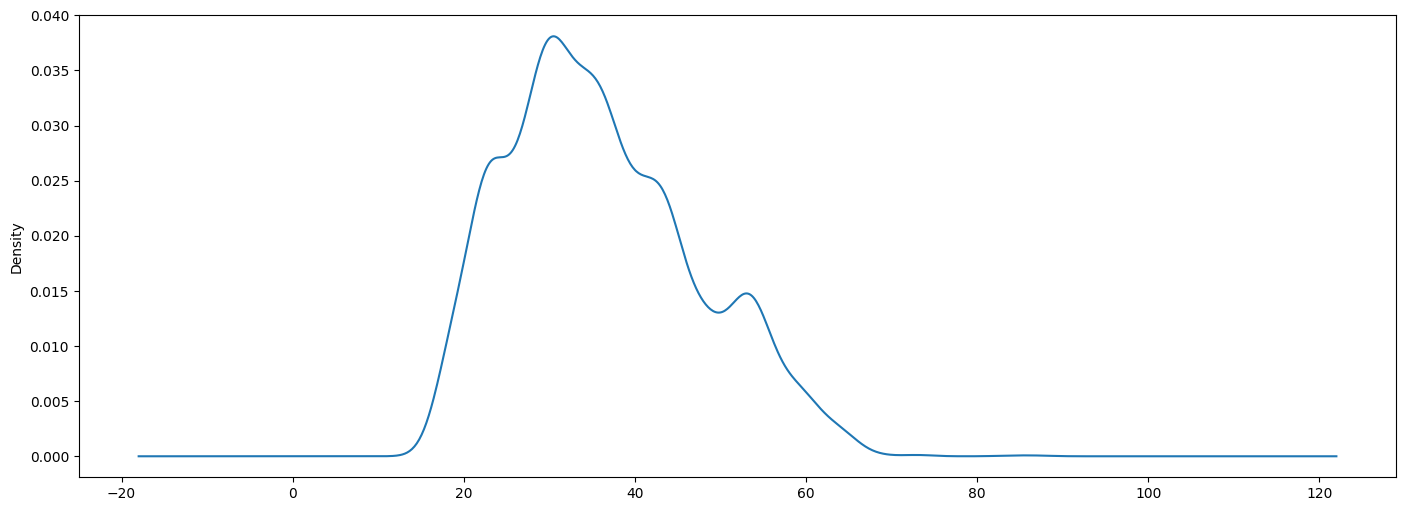

In [ ]:
sales['Customer_Age'].plot(kind = 'density', figsize = [17, 6])

<Axes: >

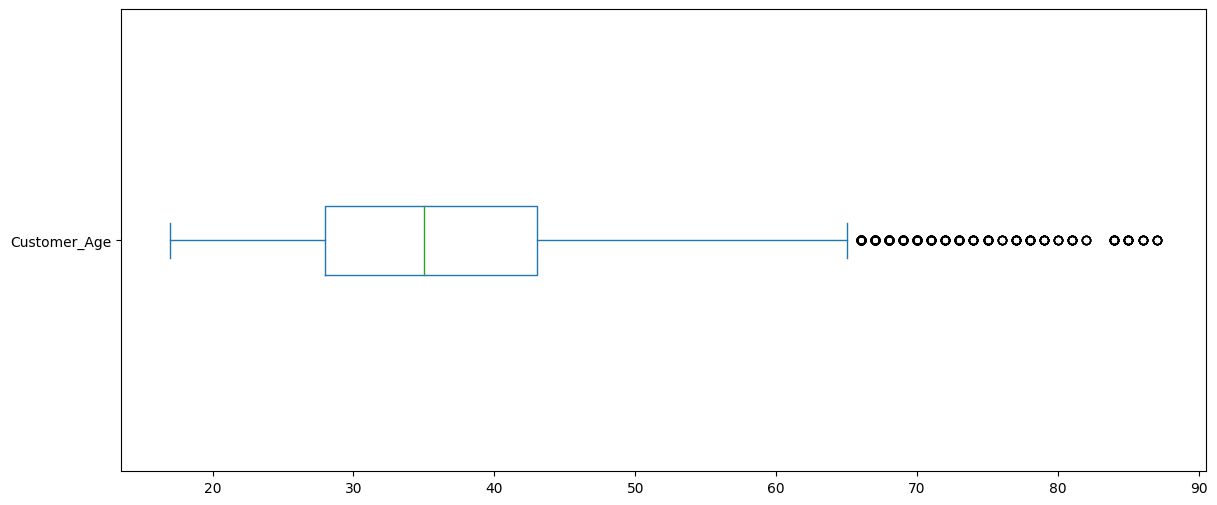

In [ ]:
sales['Customer_Age'].plot(kind = 'box', vert = False, figsize = [14, 6])

#### What's the mean of Order_Quantity?

In [ ]:
sales['Order_Quantity'].mean()

11.901659648253654

Go ahead and show a histogram and a box plot with the Order_Quantity data:

<Axes: ylabel='Frequency'>

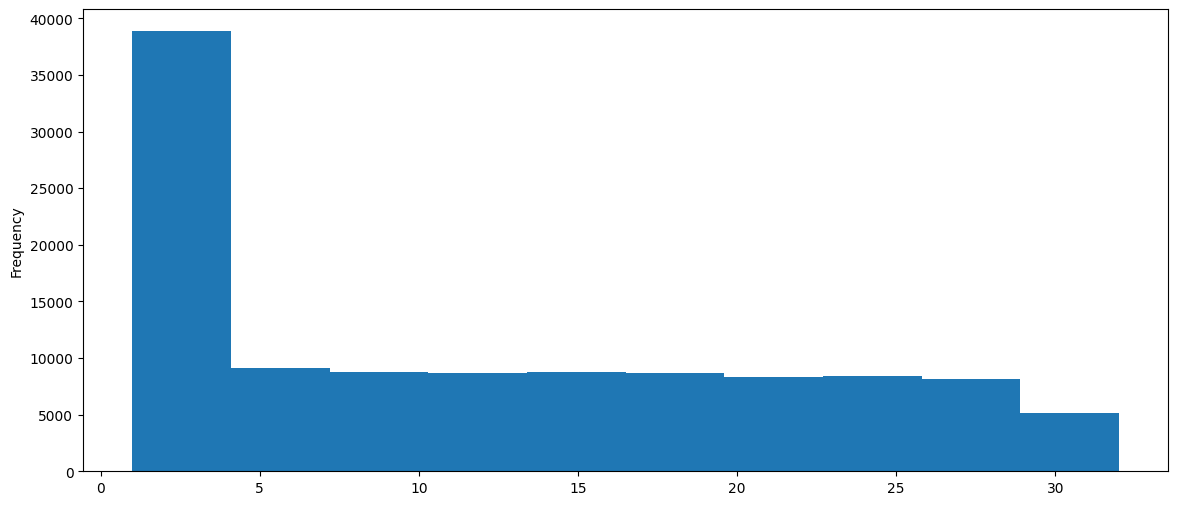

In [ ]:
sales['Order_Quantity'].plot(kind = 'hist', figsize = [14, 6])

<Axes: >

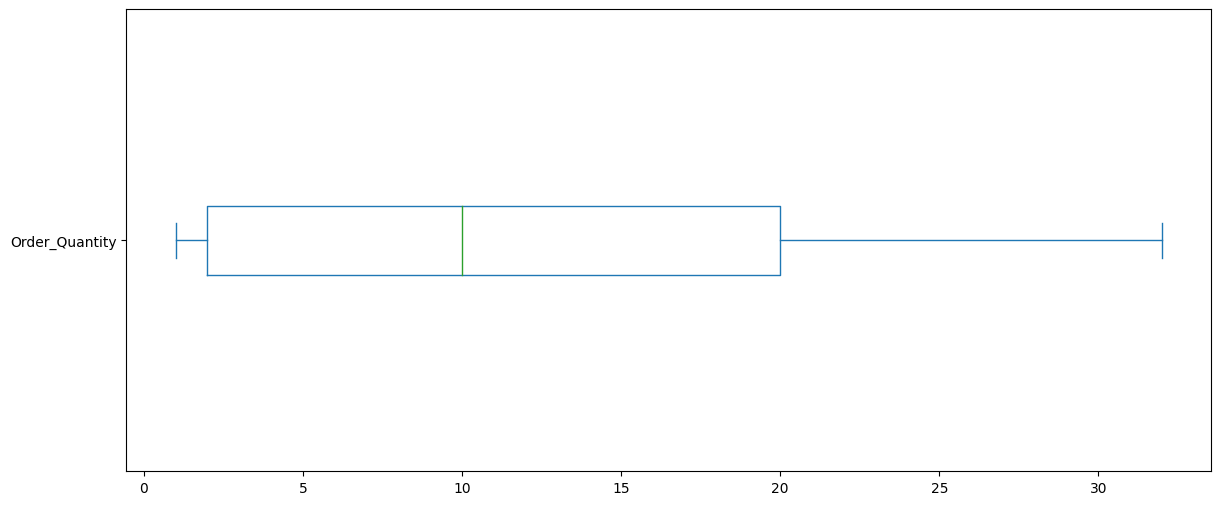

In [ ]:
sales['Order_Quantity'].plot(kind = 'box', vert = False, figsize = [14, 6])

## How many sales per year do we have?


In [ ]:
sales['Year'].value_counts().sort_index(ascending = False)

2016    29398
2015    24443
2014    29398
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

Go ahead and show a pie plot with the previous data:



<Axes: ylabel='Year'>

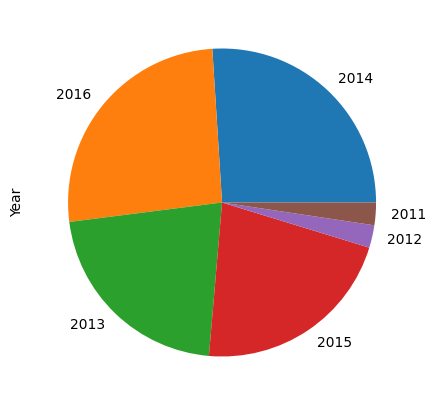

In [ ]:
sales['Year'].value_counts().plot(kind = 'pie', figsize = [5, 5])


## How many sales per month do we have?


In [ ]:
sales['Month'].value_counts(ascending = False)


June         799
March        778
December     752
May          716
April        686
February     672
January      610
October      578
November     562
September    514
August       508
July         468
Name: Month, dtype: int64

Go ahead and show a bar plot with the previous data:



<Axes: >

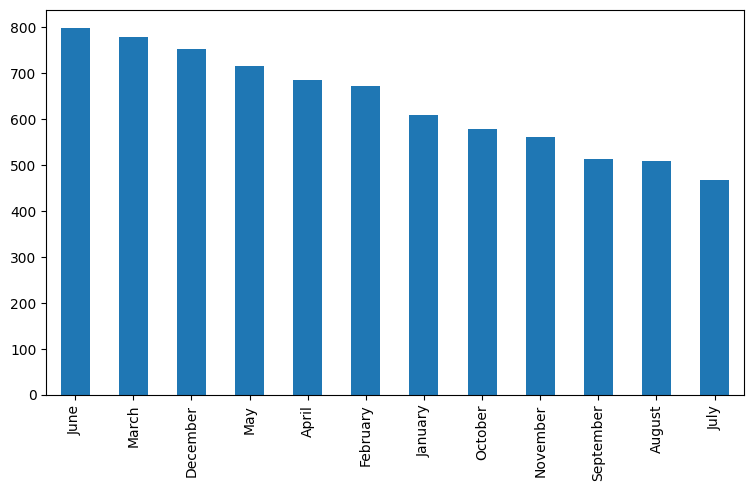

In [ ]:
sales['Month'].value_counts().plot(kind = 'bar', figsize=(9,5))


Which country has the most sales quantity of sales?


In [ ]:
sales['Country'].value_counts(1)

United States     0.326835
Canada            0.168782
Australia         0.155175
United Kingdom    0.139605
France            0.108073
Germany           0.101531
Name: Country, dtype: float64

In [ ]:
sales['Country'].value_counts()

United States     2498
Canada            1290
Australia         1186
United Kingdom    1067
France             826
Germany            776
Name: Country, dtype: int64

Go ahead and show a bar plot of the sales per country:



<Axes: >

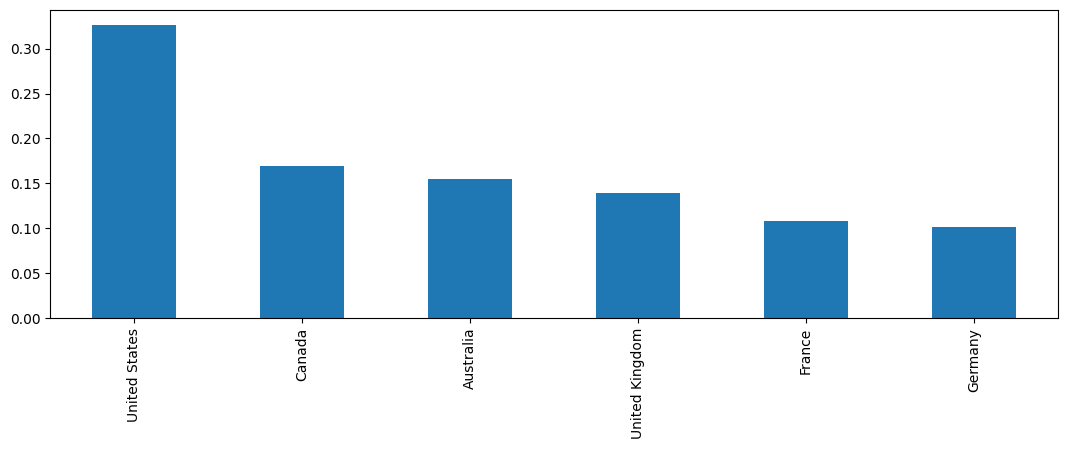

In [ ]:
sales['Country'].value_counts(1).plot(kind = 'bar', figsize = [13, 4])

## Create a list of every product sold


In [ ]:
sales['Product'].unique()


array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'Water Bottle - 30 o'], dtype=object)

Create a bar plot showing the 10 most sold products (best sellers):



<Axes: >

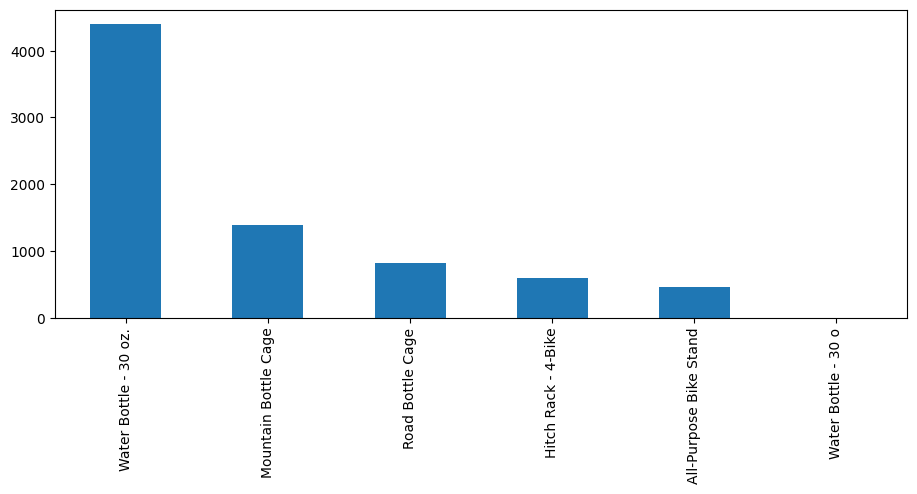

In [ ]:
sales.columns
3
sales['Product'].value_counts().head(10).plot(kind = 'bar', figsize = [11, 4])

### Can you see any relationship between Unit_Cost and Unit_Price?


In [17]:
sales[['Unit_Cost','Unit_Price']].corr()

,Unit_Cost,Unit_Price
Unit_Cost,1.000000,0.990183
Unit_Price,0.990183,1.000000


#### Show a scatter plot between both columns.



<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

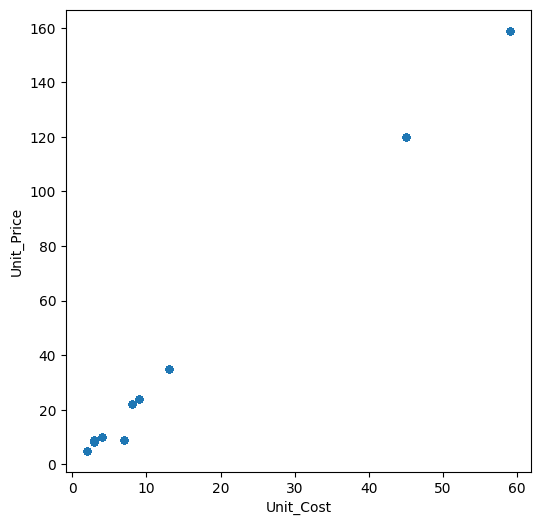

In [20]:
sales.plot(kind = 'scatter', x = 'Unit_Cost', y = 'Unit_Price', figsize = [6, 6])

## Can you see any relationship between Order_Quantity and Profit?


In [22]:
sales[['Order_Quantity', 'Profit']].corr()

,Order_Quantity,Profit
Order_Quantity,1.000000,0.315624
Profit,0.315624,1.000000


Show a scatter plot between both columns.



<Axes: xlabel='Order_Quantity', ylabel='Profit'>

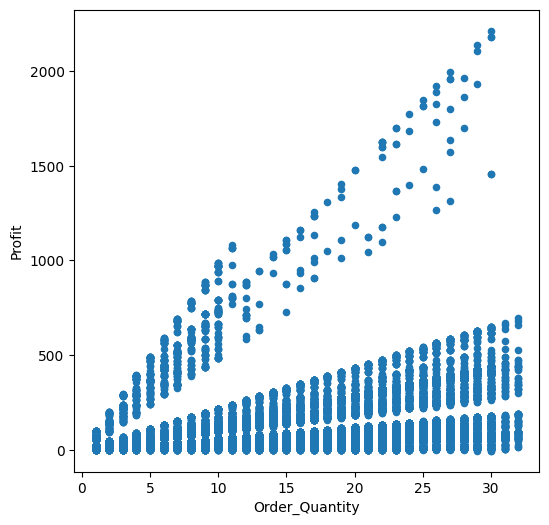

In [23]:
sales.plot(kind = 'scatter', x = 'Order_Quantity', y = 'Profit', figsize = [6, 6])

# Can you see any relationship between Profit per Country?


<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

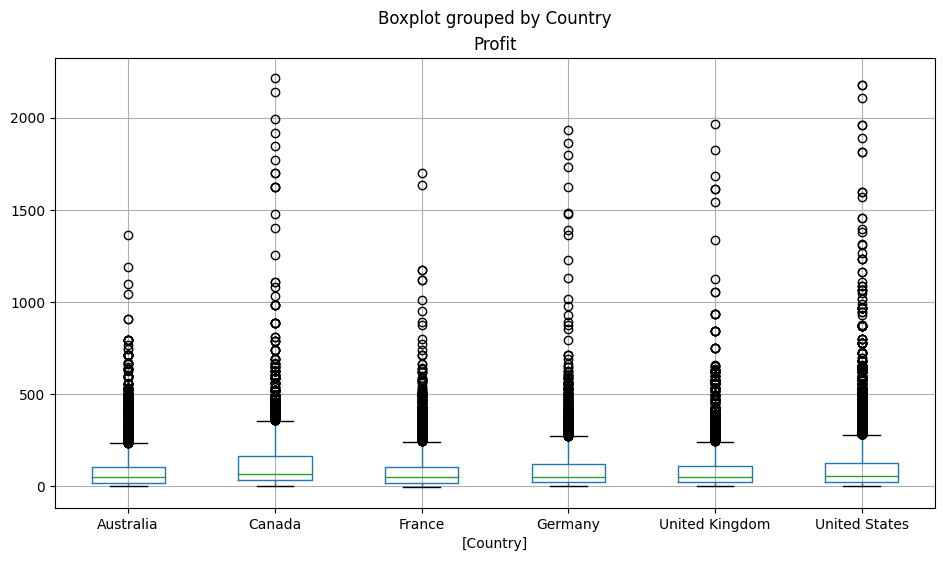

In [26]:
sales[['Profit', 'Country']].boxplot(by = 'Country', figsize = [11, 6])

#Can you see any relationship between the Customer_Age per Country?

Show a grouped box plot per country with the customer age values.



<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

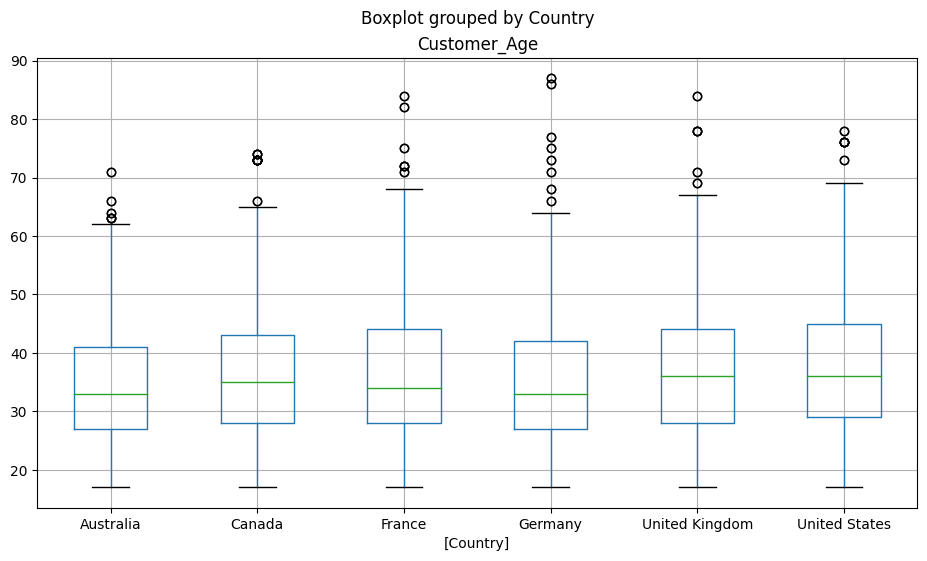

In [27]:
sales[['Customer_Age', 'Country']].boxplot(by = 'Country', figsize = [11, 6])

## Add and calculate a new Calculated_Date column

Use Day, Month, Year to create a Date column (YYYY-MM-DD).



In [56]:
sales['Calculated_Date'] = sales[['Day', 'Month', 'Year']].apply(lambda x : '{}-{}-{}'.format(x[0], x[1], x[2]), axis = 1)

sales['Calculated_Date'].head()


0    26-November-2013
1    26-November-2015
2       23-March-2014
3       23-March-2016
4         15-May-2014
Name: Calculated_Date, dtype: object

## Parse your Calculated_Date column into a datetime object


In [64]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
#sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date']).dt.strftime('%d/%m/%y')

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

## How did sales evolve through the years?

Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis.



<Axes: >

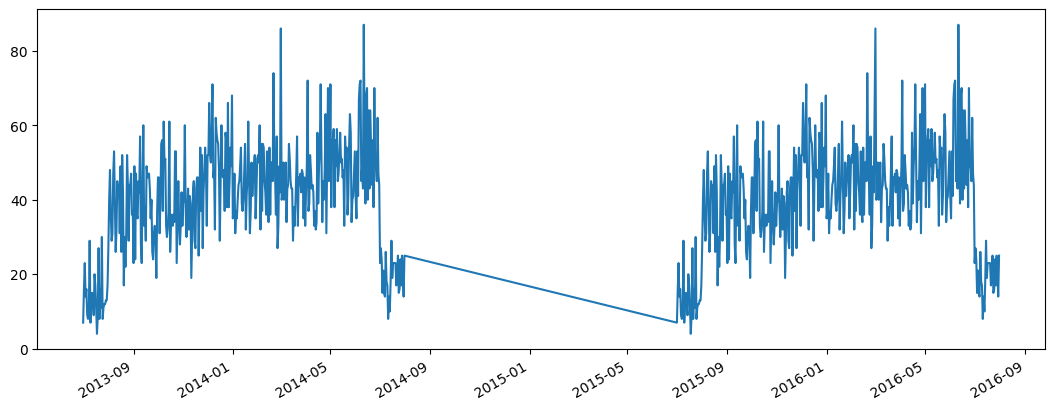

In [66]:
sales['Calculated_Date'].value_counts().plot(kind = 'li
ne', x = 'Caluculated_Date', figsize = [13, 5])


#Increase 50 U$S revenue to every sale



In [67]:
#sales['Revenue'] += 50

### How many orders were made in Canada or France?


In [83]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

7262

In [5]:
(sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]).count()


Date                10788
Day                 10788
Month               10788
Year                10788
Customer_Age        10788
Age_Group           10788
Customer_Gender     10788
Country             10788
State               10788
Product_Category    10788
Sub_Category        10788
Product             10788
Order_Quantity      10788
Unit_Cost           10788
Unit_Price          10788
Profit              10788
Cost                10788
Revenue             10788
dtype: int64

#How many Bike Racks orders were made from Canada?


In [17]:
#sales['Order_Quantity'].value_counts()
#sales.columns.unique()
#sales.head()
sales['Calculated_Date'] = sales[['Day', 'Month', 'Year']].apply(lambda x : '{}-{}-{}'.format(x[0], x[1], x[2]), axis = 1)
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Sub_Category'].value_counts()

Bottles and Cages    15876
Helmets              12158
Caps                  4358
Fenders               4032
Jerseys               3830
Gloves                2686
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [19]:
sales.loc[(sales['Sub_Category'] == 'Bike Racks') & (sales['Country'] == 'Canada')].shape[0]

104

## How many orders were made in each region (state) of France?



In [24]:
sales.columns.unique()
france_states = sales.loc[(sales['Country'] == 'France'), 'State'].value_counts()
france_states

Seine (Paris)        906
Seine Saint Denis    650
Nord                 596
Hauts de Seine       440
Essonne              406
Yveline              364
Moselle              154
Loiret               154
Seine et Marne       148
Val d'Oise            98
Val de Marne          74
Garonne (Haute)       72
Charente-Maritime     68
Loir et Cher          60
Somme                 58
Pas de Calais         38
Name: State, dtype: int64

Go ahead and show a bar plot with the results:



<Axes: >

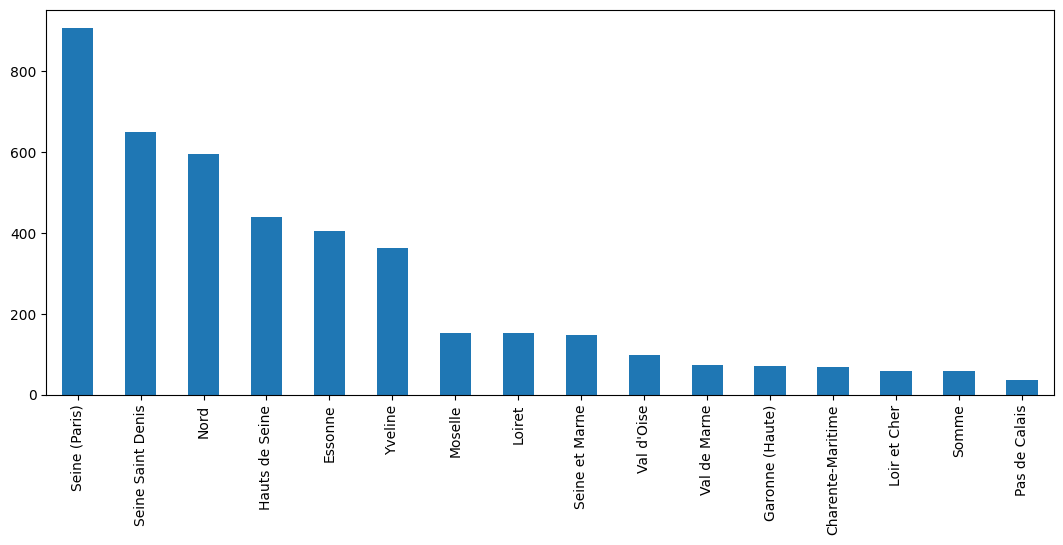

In [27]:
france_states.plot(kind = 'bar', figsize = [13, 5])

## How many sales were made per category?


In [30]:
sales.columns.unique()

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Calculated_Date'],
      dtype='object')

In [31]:
sales['Product_Category'].value_counts()

Accessories    36250
Clothing       10874
Name: Product_Category, dtype: int64

Go ahead and show a pie plot with the results:



<Axes: ylabel='Product_Category'>

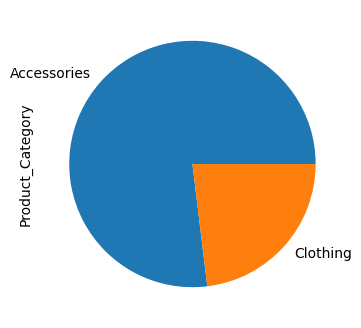

In [35]:
sales['Product_Category'].value_counts(1).plot(kind = 'pie', figsize = [6, 4])

## How many orders were made per accessory sub-categories?


In [38]:
accessory_categories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessory_categories

Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

Go ahead and show a bar plot with the results:



<Axes: >

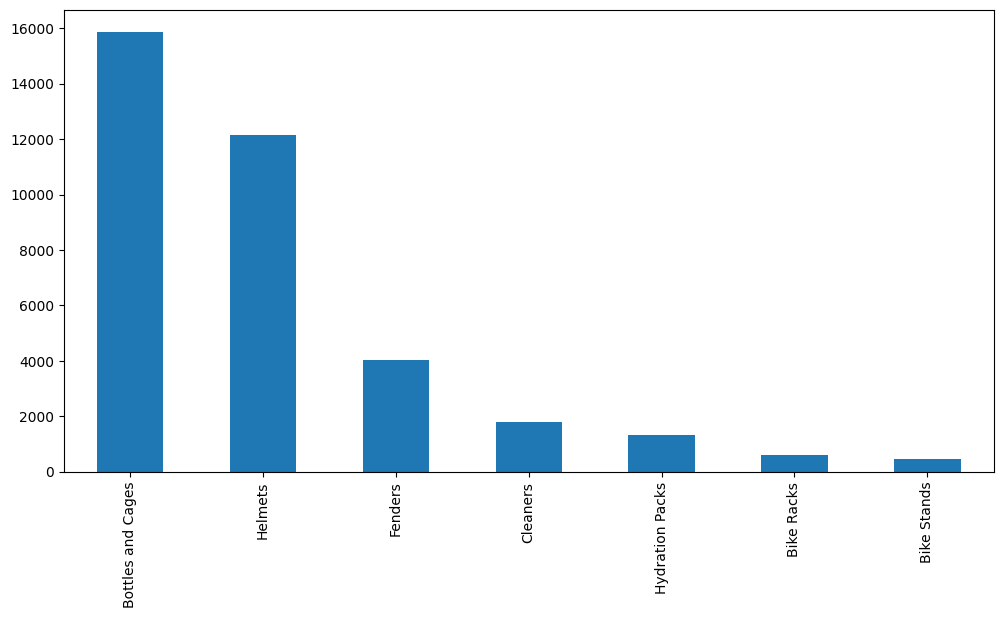

In [40]:
accessory_categories.plot(kind = 'bar', figsize = [12, 6])

## How many orders were made per bike sub-categories?


In [46]:
bike_categories = sales.loc[(sales['Sub_Category'] == 'Bike Racks') | (sales['Sub_Category'] == 'Bike Stands'), 'Sub_Category'].value_counts()
bike_categories

Bike Racks     592
Bike Stands    456
Name: Sub_Category, dtype: int64

Go ahead and show a pie plot with the results:



<Axes: ylabel='Sub_Category'>

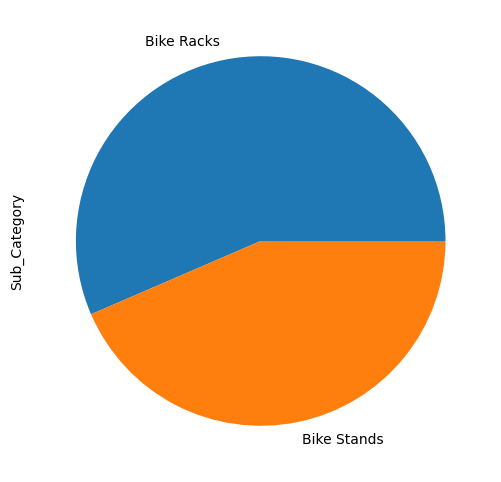

In [51]:
bike_categories.plot(kind = 'pie', figsize = [6, 6])

### Which gender has the most amount of sales?


In [54]:
sales.columns.unique()
sales['Customer_Gender'].value_counts()

M    24412
F    22712
Name: Customer_Gender, dtype: int64

<Axes: >

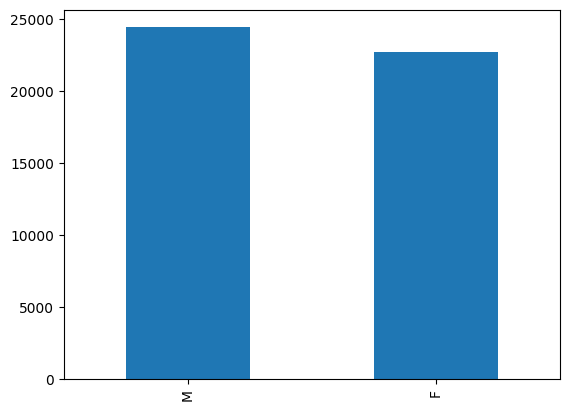

In [58]:
sales['Customer_Gender'].value_counts().plot(kind = 'bar')

## How many sales with more than 500 in Revenue were made by men?


In [63]:
sales.loc[(sales['Revenue'] > 500) & (sales['Customer_Gender'] == 'M')].shape[0]

5805

## Get the top-5 sales with the highest revenue

In [72]:
sales.sort_values(['Revenue'], ascending = False).head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2214.0,1350.0,3564.0,2016-01-07
90,2014-02-12,12,February,2014,46,Adults (35-64),M,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2178.0,1350.0,3528.0,2014-02-12
182,2014-01-17,17,January,2014,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2178.0,1350.0,3528.0,2014-01-17
244,2014-01-07,7,January,2014,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,29.0,45.0,120.0,2140.0,1305.0,3445.0,2014-01-07
183,2016-01-17,17,January,2016,53,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,29.0,45.0,120.0,2105.0,1305.0,3410.0,2016-01-17


## Get the sale with the highest revenue


In [73]:
sales.sort_values(['Revenue'], ascending = False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
245,2016-01-07,7,January,2016,31,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,30.0,45.0,120.0,2214.0,1350.0,3564.0,2016-01-07


## What is the mean Order_Quantity of orders with more than 10K in revenue?

In [76]:
#sales.loc[sales['Revenue'] > 10_000, 'Order_Quantity'].mean()
cont = sales['Revenue'] > 10_000
sales.loc[cont, 'Order_Quantity'].mean()

nan

## What is the mean Order_Quantity of orders with less than 10K in revenue?

In [77]:
cont = sales['Revenue'] < 10_000
sales.loc[cont, 'Order_Quantity'].mean()

14.92379679144385

## How many orders were made in May of 2016?


In [78]:
cont1 = sales['Month'] == 'May'
cont2 = sales['Year'] == 2016

sales.loc[cont1 & cont2].shape[0]

2286

## How many orders were made between May and July of 2016?



In [81]:
cont1 = sales['Month'].isin(['May', 'June', 'July'])
cont2 = sales['Year'] == 2016

sales.loc[cont1 & cont2].shape[0]

5580

Show a grouped box plot per month with the profit values.



<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

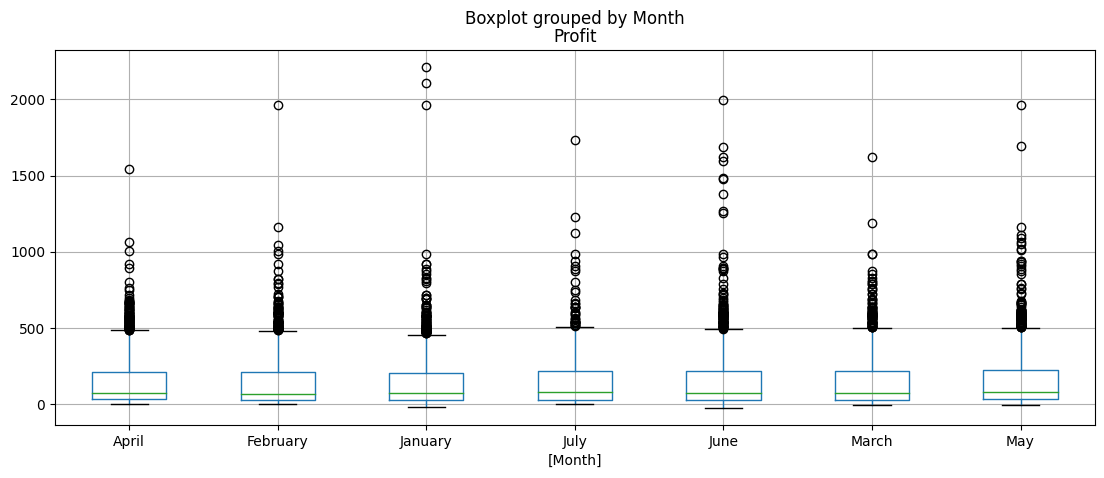

In [88]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by = 'Month', figsize = [13, 5])

#Add 7.2% TAX on every sale Unit_Price within United States


In [90]:
#(sales.loc[sales['Country'] == 'United States', 'Unit_Price']) *= 1.072